# Credit Card Prediction 

### by  Oyelayo Seye

## Introduction

## About Dataset

> A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

> I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

> Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

> We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import seaborn as sb
import zipfile as zf
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact, fixed,interactive, fixed, interact_manual
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.info(verbose= 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
df.shape

(10127, 23)

In [5]:
# renaming the long columns
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'NB_Classifier_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_Classifier_2'}, 
          inplace=True)

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Classifier_1,NB_Classifier_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
#checking for missing values
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_Classifier_1             0
NB_Classifier_2             0
dtype: int64

In [8]:
#checking for duplicate
df.duplicated().sum()

0

In [9]:
#mapping the categorical data
catgorical = df.select_dtypes('object')
catgorical

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [10]:
#inspecting the categorical data for any inconsistences data using a bar chat
def bar(df, column, figsize=[6,4]):
    plt.figure(figsize=figsize)
    color = sb.color_palette()[0]
    base_order = df[column].value_counts().index
    bar = sb.countplot(data=df, x=column, color=color, order=base_order)
    plt.xticks(rotation=20)

In [11]:
#checking for categorical columns
catgorical.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

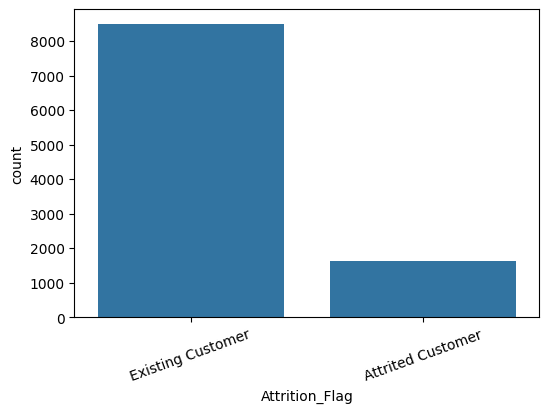

In [12]:
bar(df,'Attrition_Flag')

In [13]:
for i in df['Attrition_Flag'].value_counts():
    print('{:0.1f}%'.format(round((i/len(df['Attrition_Flag'])) * 100)))

84.0%
16.0%


In [14]:
len(df['Attrition_Flag'])

10127

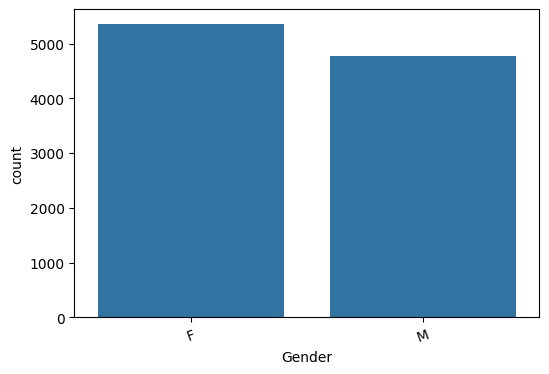

In [15]:
bar(df,'Gender')

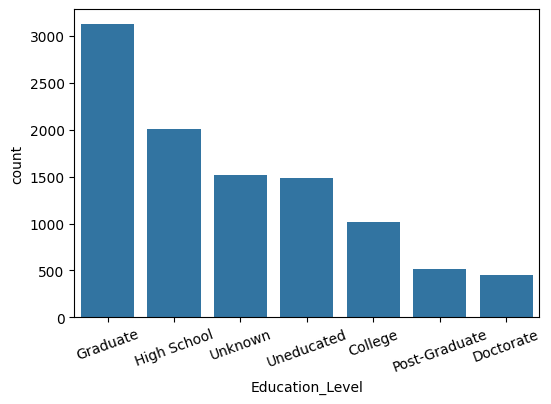

In [16]:
bar(df,'Education_Level')

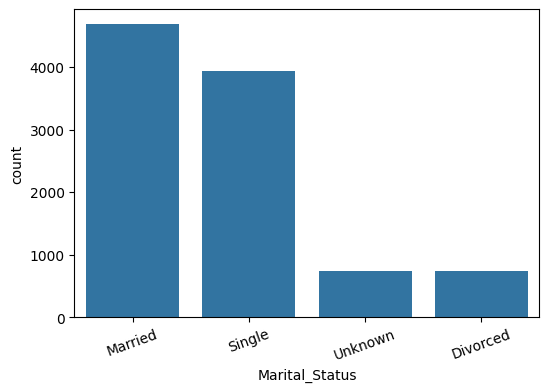

In [17]:
bar(df,'Marital_Status')

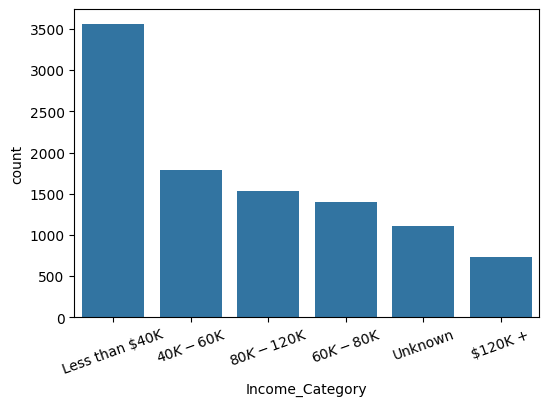

In [18]:
bar(df,'Income_Category')

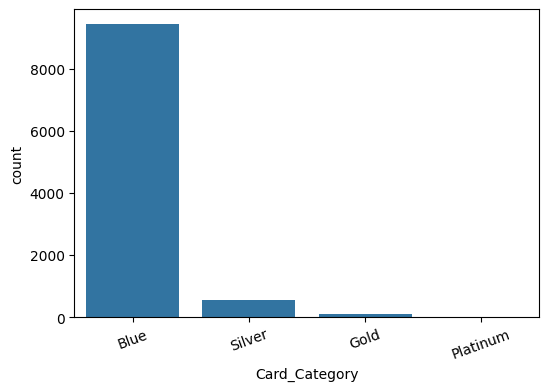

In [19]:
bar(df,'Card_Category')

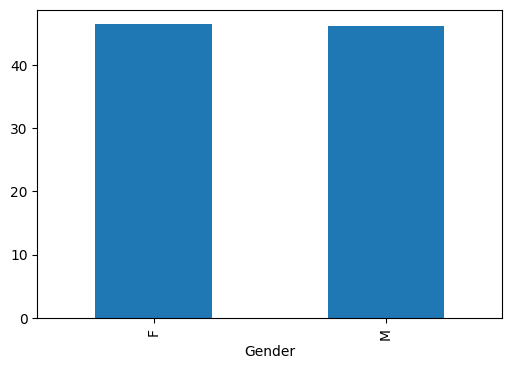

In [20]:
df.groupby(df['Gender'])['Customer_Age'].mean().plot(kind = 'bar', figsize = [6,4]);

In [21]:
df.groupby(df['Gender'])['Customer_Age'].mean()

Gender
F    46.456887
M    46.178863
Name: Customer_Age, dtype: float64

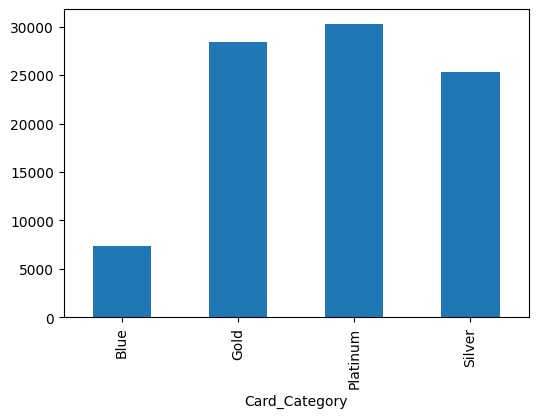

In [22]:
df.groupby(df['Card_Category'])['Credit_Limit'].mean().plot(kind = 'bar', figsize = [6,4]);

In [23]:
round(df.groupby(df['Card_Category'])['Credit_Limit'].mean(),2)

Card_Category
Blue         7363.78
Gold        28416.37
Platinum    30283.45
Silver      25277.84
Name: Credit_Limit, dtype: float64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


<Figure size 640x480 with 0 Axes>

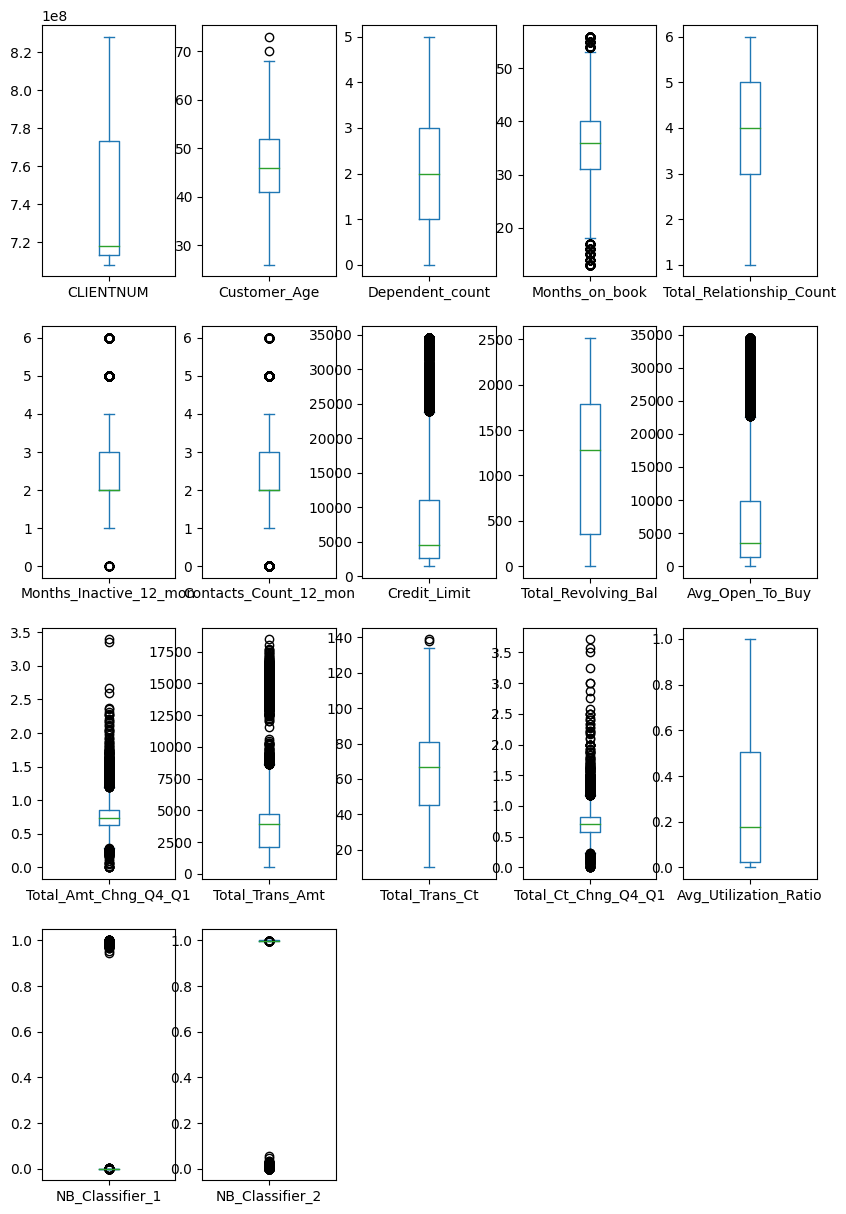

In [66]:
#checking for outliers

plt.figure(figsize=(8, 6), dpi=80)

df.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)

plt.rcParams["figure.figsize"] = (10,15)
plt.show()


In [26]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

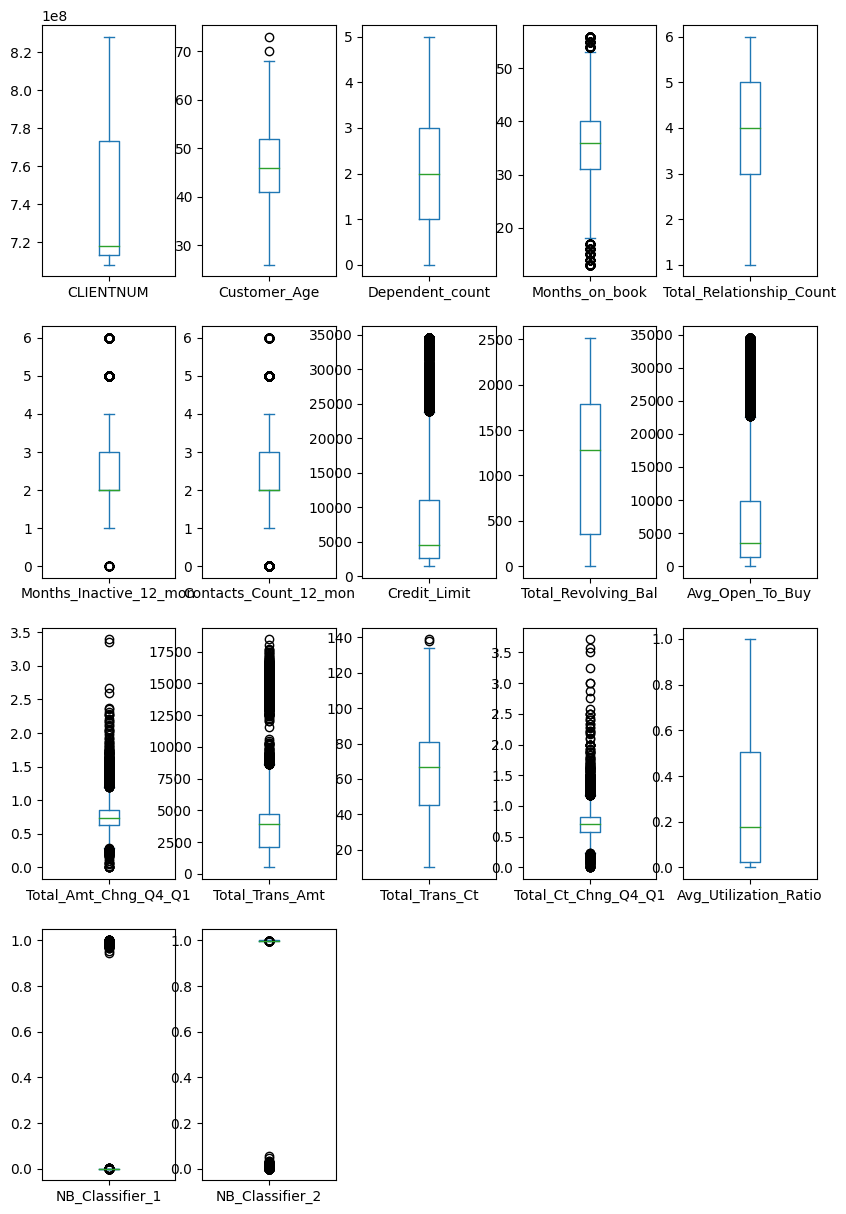

In [27]:
#checking for outliers

plt.figure(figsize=(8, 6), dpi=80)

df.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)

plt.rcParams["figure.figsize"] = (10,15)
plt.show()


In [28]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_Classifier_1             0
NB_Classifier_2             0
dtype: int64

In [29]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [30]:
#drop outliers
df.dropna(inplace=True)

In [31]:
#split the data to X and y
features = ['CLIENTNUM', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2']
target = ['Attrition_Flag']

X = df[features].values
y = df[target].values

In [32]:
# Define the number of folds
k = 10

# Instantiate the k-fold cross-validator
kf = RepeatedStratifiedKFold(n_splits=k, n_repeats=3,  random_state=42)

# Loop over the folds
for train_index, test_index in kf.split(X, y):
    # Get the training and test data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    


In [33]:
print('X_train', X_train.shape)
print ('X_test', X_test.shape)
print('y_train', y_train.shape)
print ('y_test', y_test.shape)

X_train (9115, 22)
X_test (1012, 22)
y_train (9115, 1)
y_test (1012, 1)


In [34]:
y_test

array([['Existing Customer'],
       ['Existing Customer'],
       ['Existing Customer'],
       ...,
       ['Attrited Customer'],
       ['Attrited Customer'],
       ['Attrited Customer']], dtype=object)

In [35]:
X_test[:, np.array([type(element) == str for element in X_test[0]])]

array([['F', 'Graduate', 'Single', 'Less than $40K', 'Blue'],
       ['M', 'Unknown', 'Unknown', '$80K - $120K', 'Blue'],
       ['M', 'Post-Graduate', 'Single', '$80K - $120K', 'Blue'],
       ...,
       ['M', 'High School', 'Divorced', '$60K - $80K', 'Blue'],
       ['F', 'Uneducated', 'Single', 'Unknown', 'Blue'],
       ['M', 'Graduate', 'Unknown', '$40K - $60K', 'Blue']], dtype=object)

In [36]:
# Encode categorical features using one-hot encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[:, np.array([type(element) == str for element in X_train[0]])] = encoder.fit_transform(X_train[:, np.array([type(element) == str for element in X_train[0]])])
X_test[:, np.array([type(element) == str for element in X_test[0]])] = encoder.transform(X_test[:, np.array([type(element) == str for element in X_test[0]])])


# Encode categorical output using label encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [37]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')


In [38]:
X_trainDf = pd.DataFrame(X_train, columns= features)
X_testDf = pd.DataFrame(X_test, columns= features)
X_trainDf

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Classifier_1,NB_Classifier_2
0,768805383,45,1,3,3,1,2,0,39,5,...,12691,777,11914,1,1144,42,1,0,0,0
1,713982108,51,1,3,2,1,3,0,36,4,...,3418,0,3418,2,1887,20,2,0,0,0
2,769911858,40,0,4,3,3,4,0,34,3,...,3313,2517,796,1,1171,20,2,0,0,0
3,709106358,40,1,3,5,1,2,0,21,5,...,4716,0,4716,2,816,28,2,0,0,0
4,713061558,44,1,2,2,1,1,0,36,3,...,4010,1247,2763,1,1088,24,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,713899383,56,0,1,2,2,4,0,50,4,...,3688,606,3082,0,14596,120,0,0,0,0
9111,772366833,50,1,2,2,2,1,0,40,3,...,4003,1851,2152,0,15476,117,0,0,0,0
9112,710638233,41,1,2,6,0,1,0,25,4,...,4277,2186,2091,0,8764,69,0,0,0,0
9113,716506083,44,0,1,3,1,4,0,36,5,...,5409,0,5409,0,10291,60,0,0,0,0


In [39]:
X_testDf

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Classifier_1,NB_Classifier_2
0,818770008,49,0,5,2,2,4,0,44,6,...,8256,864,7392,1,1291,33,3,0,0,0
1,714885258,44,1,4,6,3,3,0,37,5,...,4234,972,3262,1,1348,27,1,0,0,0
2,709967358,48,1,4,4,2,3,0,36,6,...,30367,2362,28005,1,1671,27,0,0,0,0
3,771071958,41,0,3,2,2,4,0,28,6,...,7768,1669,6099,0,1051,22,0,0,0,0
4,773146383,50,0,1,0,2,1,3,43,3,...,17304,2517,14787,1,1756,33,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,716644008,55,1,3,2,2,0,3,36,4,...,34516,0,34516,1,9931,70,0,0,0,0
1008,713924283,61,1,0,2,2,2,0,54,2,...,11859,1644,10215,0,8930,79,0,0,0,0
1009,713733633,27,1,0,3,0,2,0,36,2,...,13303,2517,10786,0,10219,85,0,0,0,0
1010,716893683,55,0,3,5,2,5,0,47,4,...,14657,2517,12140,0,6009,53,0,0,0,0


In [40]:
X_trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9115 entries, 0 to 9114
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   CLIENTNUM                 9115 non-null   int32
 1   Customer_Age              9115 non-null   int32
 2   Gender                    9115 non-null   int32
 3   Dependent_count           9115 non-null   int32
 4   Education_Level           9115 non-null   int32
 5   Marital_Status            9115 non-null   int32
 6   Income_Category           9115 non-null   int32
 7   Card_Category             9115 non-null   int32
 8   Months_on_book            9115 non-null   int32
 9   Total_Relationship_Count  9115 non-null   int32
 10  Months_Inactive_12_mon    9115 non-null   int32
 11  Contacts_Count_12_mon     9115 non-null   int32
 12  Credit_Limit              9115 non-null   int32
 13  Total_Revolving_Bal       9115 non-null   int32
 14  Avg_Open_To_Buy           9115 non-null 

In [41]:
X_trainDf.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,9115.0,7.391502e+08,3.685434e+07,708082083.0,713030320.5,717929133.0,773091258.0,828343083.0
Customer_Age,9115.0,4.632803e+01,8.018844e+00,26.0,41.0,46.0,52.0,73.0
Gender,9115.0,4.701042e-01,4.991328e-01,0.0,0.0,0.0,1.0,1.0
Dependent_count,9115.0,2.351947e+00,1.294345e+00,0.0,1.0,2.0,3.0,5.0
Education_Level,9115.0,3.101152e+00,1.834098e+00,0.0,2.0,3.0,5.0,6.0
Marital_Status,9115.0,1.461657e+00,7.364718e-01,0.0,1.0,1.0,2.0,3.0
Income_Category,9115.0,2.861766e+00,1.505743e+00,0.0,2.0,3.0,4.0,5.0
Card_Category,9115.0,1.791552e-01,6.916886e-01,0.0,0.0,0.0,0.0,3.0
Months_on_book,9115.0,3.593922e+01,7.942825e+00,13.0,32.0,36.0,40.0,56.0
Total_Relationship_Count,9115.0,3.811629e+00,1.557809e+00,1.0,3.0,4.0,5.0,6.0


In [42]:
#Rescaling our data
scaler = MinMaxScaler().fit(X_trainDf)
X_trainDf = scaler.transform(X_trainDf)
X_testDf = scaler.transform(X_testDf)

In [43]:
X_trainDf_res = pd.DataFrame(X_trainDf, columns= features)
X_trainDf_res

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Classifier_1,NB_Classifier_2
0,0.504929,0.404255,1.0,0.6,0.500000,0.333333,0.4,0.0,0.604651,0.8,...,0.340196,0.308701,0.345116,0.333333,0.035273,0.248062,0.333333,0.0,0.0,0.0
1,0.049060,0.531915,1.0,0.6,0.333333,0.333333,0.6,0.0,0.534884,0.6,...,0.059859,0.000000,0.098948,0.666667,0.076611,0.077519,0.666667,0.0,0.0,0.0
2,0.514130,0.297872,0.0,0.8,0.500000,1.000000,0.8,0.0,0.488372,0.4,...,0.056684,1.000000,0.022977,0.333333,0.036775,0.077519,0.666667,0.0,0.0,0.0
3,0.008517,0.297872,1.0,0.6,0.833333,0.333333,0.4,0.0,0.186047,0.8,...,0.099099,0.000000,0.136557,0.666667,0.017025,0.139535,0.666667,0.0,0.0,0.0
4,0.041406,0.382979,1.0,0.4,0.333333,0.333333,0.2,0.0,0.534884,0.4,...,0.077756,0.495431,0.079970,0.333333,0.032158,0.108527,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,0.048372,0.638298,0.0,0.2,0.333333,0.666667,0.8,0.0,0.860465,0.6,...,0.068021,0.240763,0.089213,0.000000,0.783688,0.852713,0.000000,0.0,0.0,0.0
9111,0.534544,0.510638,1.0,0.4,0.333333,0.666667,0.2,0.0,0.627907,0.4,...,0.077544,0.735399,0.062266,0.000000,0.832647,0.829457,0.000000,0.0,0.0,0.0
9112,0.021255,0.319149,1.0,0.4,1.000000,0.000000,0.2,0.0,0.279070,0.6,...,0.085827,0.868494,0.060499,0.000000,0.459219,0.457364,0.000000,0.0,0.0,0.0
9113,0.070048,0.382979,0.0,0.2,0.500000,0.333333,0.8,0.0,0.534884,0.8,...,0.120050,0.000000,0.156637,0.000000,0.544175,0.387597,0.000000,0.0,0.0,0.0


In [44]:
X_trainDf_res.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,9115.0,0.258339,0.306453,0.0,0.041146,0.081881,0.540567,1.0
Customer_Age,9115.0,0.432511,0.170614,0.0,0.319149,0.425532,0.553191,1.0
Gender,9115.0,0.470104,0.499133,0.0,0.000000,0.000000,1.000000,1.0
Dependent_count,9115.0,0.470389,0.258869,0.0,0.200000,0.400000,0.600000,1.0
Education_Level,9115.0,0.516859,0.305683,0.0,0.333333,0.500000,0.833333,1.0
Marital_Status,9115.0,0.487219,0.245491,0.0,0.333333,0.333333,0.666667,1.0
Income_Category,9115.0,0.572353,0.301149,0.0,0.400000,0.600000,0.800000,1.0
Card_Category,9115.0,0.059718,0.230563,0.0,0.000000,0.000000,0.000000,1.0
Months_on_book,9115.0,0.533470,0.184717,0.0,0.441860,0.534884,0.627907,1.0
Total_Relationship_Count,9115.0,0.562326,0.311562,0.0,0.400000,0.600000,0.800000,1.0


In [45]:
X_testDf_res = pd.DataFrame(X_testDf, columns= features)
X_testDf_res

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Classifier_1,NB_Classifier_2
0,0.920398,0.489362,0.0,1.0,0.333333,0.666667,0.8,0.0,0.720930,1.0,...,0.206119,0.343266,0.214093,0.333333,0.043452,0.178295,1.000000,0.0,0.0,0.0
1,0.056570,0.382979,1.0,0.8,1.000000,1.000000,0.6,0.0,0.558140,0.8,...,0.084527,0.386174,0.094428,0.333333,0.046623,0.131783,0.333333,0.0,0.0,0.0
2,0.015677,0.468085,1.0,0.8,0.666667,0.666667,0.6,0.0,0.534884,1.0,...,0.874569,0.938419,0.811346,0.333333,0.064593,0.131783,0.000000,0.0,0.0,0.0
3,0.523776,0.319149,0.0,0.6,0.333333,0.666667,0.8,0.0,0.348837,1.0,...,0.191366,0.663091,0.176629,0.000000,0.030099,0.093023,0.000000,0.0,0.0,0.0
4,0.541026,0.510638,0.0,0.2,0.000000,0.666667,0.2,1.0,0.697674,0.4,...,0.479654,1.000000,0.428360,0.333333,0.069322,0.178295,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.071195,0.617021,1.0,0.6,0.333333,0.666667,0.0,1.0,0.534884,0.6,...,1.000000,0.000000,1.000000,0.333333,0.524146,0.465116,0.000000,0.0,0.0,0.0
1008,0.048579,0.744681,1.0,0.0,0.333333,0.666667,0.4,0.0,0.953488,0.2,...,0.315043,0.653159,0.295889,0.000000,0.468454,0.534884,0.000000,0.0,0.0,0.0
1009,0.046994,0.021277,1.0,0.0,0.500000,0.000000,0.4,0.0,0.534884,0.2,...,0.358698,1.000000,0.312433,0.000000,0.540169,0.581395,0.000000,0.0,0.0,0.0
1010,0.073271,0.617021,0.0,0.6,0.833333,0.666667,1.0,0.0,0.790698,0.6,...,0.399631,1.000000,0.351665,0.000000,0.305942,0.333333,0.000000,0.0,0.0,0.0


In [46]:
X_testDf_res.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,1012.0,0.260620,0.310689,0.000021,0.041833,0.081350,0.542013,0.999111
Customer_Age,1012.0,0.432070,0.170265,0.000000,0.319149,0.425532,0.553191,0.872340
Gender,1012.0,0.478261,0.499774,0.000000,0.000000,0.000000,1.000000,1.000000
Dependent_count,1012.0,0.458893,0.267771,0.000000,0.200000,0.400000,0.600000,1.000000
Education_Level,1012.0,0.509223,0.306938,0.000000,0.333333,0.500000,0.833333,1.000000
Marital_Status,1012.0,0.493083,0.249973,0.000000,0.333333,0.333333,0.666667,1.000000
Income_Category,1012.0,0.576680,0.299174,0.000000,0.400000,0.600000,0.800000,1.000000
Card_Category,1012.0,0.061924,0.235136,0.000000,0.000000,0.000000,0.000000,1.000000
Months_on_book,1012.0,0.530954,0.194704,0.000000,0.418605,0.534884,0.651163,1.000000
Total_Relationship_Count,1012.0,0.564229,0.304833,0.000000,0.400000,0.600000,0.800000,1.000000


In [47]:
#Normalization our data
scaler = Normalizer().fit(X_trainDf_res)
X_trainDf_resN = scaler.transform(X_trainDf_res)
X_testDf_resN = scaler.transform(X_testDf_res)

In [48]:
X_trainDf_resN = pd.DataFrame(X_trainDf_resN, columns= features)
X_trainDf_resN 

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Classifier_1,NB_Classifier_2
0,0.246439,0.197303,0.488066,0.292840,0.244033,0.162689,0.195226,0.000000,0.295110,0.390453,...,0.166038,0.150666,0.168440,0.162689,0.017216,0.121071,0.162689,0.0,0.0,0.0
1,0.025116,0.272309,0.511941,0.307164,0.170647,0.170647,0.307164,0.000000,0.273829,0.307164,...,0.030644,0.000000,0.050656,0.341294,0.039220,0.039685,0.341294,0.0,0.0,0.0
2,0.222894,0.129139,0.000000,0.346829,0.216768,0.433537,0.346829,0.000000,0.211727,0.173415,...,0.024575,0.433537,0.009961,0.144512,0.015943,0.033608,0.289025,0.0,0.0,0.0
3,0.004230,0.147943,0.496667,0.298000,0.413889,0.165556,0.198667,0.000000,0.092403,0.397334,...,0.049219,0.000000,0.067823,0.331111,0.008456,0.069302,0.331111,0.0,0.0,0.0
4,0.025993,0.240425,0.627775,0.251110,0.209258,0.209258,0.125555,0.000000,0.335787,0.251110,...,0.048813,0.311019,0.050203,0.209258,0.020188,0.068131,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,0.022481,0.296649,0.000000,0.092950,0.154917,0.309834,0.371800,0.000000,0.399902,0.278850,...,0.031613,0.111895,0.041462,0.000000,0.364219,0.396299,0.000000,0.0,0.0,0.0
9111,0.235561,0.225027,0.440677,0.176271,0.146892,0.293785,0.088135,0.000000,0.276704,0.176271,...,0.034172,0.324074,0.027439,0.000000,0.366929,0.365523,0.000000,0.0,0.0,0.0
9112,0.010266,0.154146,0.482992,0.193197,0.482992,0.000000,0.096598,0.000000,0.134788,0.289795,...,0.041454,0.419476,0.029221,0.000000,0.221799,0.220903,0.000000,0.0,0.0,0.0
9113,0.038568,0.210869,0.000000,0.110121,0.275302,0.183535,0.440483,0.000000,0.294509,0.440483,...,0.066100,0.000000,0.086245,0.000000,0.299625,0.213412,0.000000,0.0,0.0,0.0


In [49]:
X_trainDf_resN.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,9115.0,0.123829,0.144897,0.0,0.020622,0.040401,0.262802,0.636262
Customer_Age,9115.0,0.213369,0.084918,0.0,0.155661,0.210386,0.271051,0.534179
Gender,9115.0,0.219341,0.236253,0.0,0.000000,0.000000,0.459863,0.674492
Dependent_count,9115.0,0.231987,0.127302,0.0,0.122287,0.232417,0.322192,0.678633
Education_Level,9115.0,0.251726,0.144253,0.0,0.160494,0.231483,0.373291,0.699280
Marital_Status,9115.0,0.239371,0.118165,0.0,0.161870,0.206374,0.326670,0.607850
Income_Category,9115.0,0.286785,0.158184,0.0,0.148502,0.288803,0.420741,0.768448
Card_Category,9115.0,0.024208,0.093976,0.0,0.000000,0.000000,0.000000,0.574426
Months_on_book,9115.0,0.262929,0.089990,0.0,0.209837,0.263984,0.318502,0.648744
Total_Relationship_Count,9115.0,0.276719,0.150961,0.0,0.178602,0.284051,0.400740,0.678082


In [50]:
X_testDf_resN = pd.DataFrame(X_testDf_resN, columns= features)
X_testDf_resN

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Classifier_1,NB_Classifier_2
0,0.366936,0.195094,0.000000,0.398671,0.132890,0.265781,0.318937,0.000000,0.287414,0.398671,...,0.082174,0.136850,0.085353,0.132890,0.017323,0.071081,0.398671,0.0,0.0,0.0
1,0.023805,0.161160,0.420806,0.336645,0.420806,0.420806,0.252484,0.000000,0.234869,0.336645,...,0.035570,0.162504,0.039736,0.140269,0.019619,0.055455,0.140269,0.0,0.0,0.0
2,0.005846,0.174543,0.372888,0.298311,0.248592,0.248592,0.223733,0.000000,0.199452,0.372888,...,0.326117,0.349925,0.302542,0.124296,0.024086,0.049140,0.000000,0.0,0.0,0.0
3,0.271953,0.165707,0.000000,0.311530,0.173072,0.346144,0.415373,0.000000,0.181122,0.519216,...,0.099360,0.344288,0.091709,0.000000,0.015628,0.048299,0.000000,0.0,0.0,0.0
4,0.248027,0.234096,0.000000,0.091688,0.000000,0.305626,0.091688,0.458439,0.319841,0.183375,...,0.219892,0.458439,0.196377,0.152813,0.031780,0.081737,0.152813,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.026452,0.229250,0.371543,0.222926,0.123848,0.247695,0.000000,0.371543,0.198732,0.222926,...,0.371543,0.000000,0.371543,0.123848,0.194743,0.172811,0.000000,0.0,0.0,0.0
1008,0.022144,0.339447,0.455828,0.000000,0.151943,0.303886,0.182331,0.000000,0.434627,0.091166,...,0.143606,0.297728,0.134874,0.000000,0.213535,0.243815,0.000000,0.0,0.0,0.0
1009,0.023627,0.010697,0.502776,0.000000,0.251388,0.000000,0.201110,0.000000,0.268927,0.100555,...,0.180344,0.502776,0.157084,0.000000,0.271584,0.292312,0.000000,0.0,0.0,0.0
1010,0.030272,0.254927,0.000000,0.247895,0.344298,0.275438,0.413158,0.000000,0.326683,0.247895,...,0.165111,0.413158,0.145293,0.000000,0.126402,0.137719,0.000000,0.0,0.0,0.0


In [51]:
X_testDf_resN.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,1012.0,0.123710,0.144954,0.000010,0.020935,0.040797,0.258482,0.606201
Customer_Age,1012.0,0.211842,0.082949,0.000000,0.155592,0.203911,0.269020,0.485435
Gender,1012.0,0.221441,0.234662,0.000000,0.000000,0.000000,0.460364,0.650681
Dependent_count,1012.0,0.225696,0.130581,0.000000,0.113165,0.225028,0.317111,0.670875
Education_Level,1012.0,0.246792,0.145224,0.000000,0.159640,0.228332,0.363686,0.654932
Marital_Status,1012.0,0.241694,0.121140,0.000000,0.160597,0.220117,0.329082,0.583006
Income_Category,1012.0,0.288670,0.158477,0.000000,0.154928,0.288650,0.420233,0.687121
Card_Category,1012.0,0.025101,0.095755,0.000000,0.000000,0.000000,0.000000,0.509751
Months_on_book,1012.0,0.260298,0.092852,0.000000,0.203355,0.265393,0.320620,0.553056
Total_Relationship_Count,1012.0,0.276556,0.146913,0.000000,0.184768,0.281022,0.397300,0.643900


In [52]:
X_trainDf_resN['Attrition_Flag'] = y_train
X_trainDf_resN

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Classifier_1,NB_Classifier_2,Attrition_Flag
0,0.246439,0.197303,0.488066,0.292840,0.244033,0.162689,0.195226,0.000000,0.295110,0.390453,...,0.150666,0.168440,0.162689,0.017216,0.121071,0.162689,0.0,0.0,0.0,1
1,0.025116,0.272309,0.511941,0.307164,0.170647,0.170647,0.307164,0.000000,0.273829,0.307164,...,0.000000,0.050656,0.341294,0.039220,0.039685,0.341294,0.0,0.0,0.0,1
2,0.222894,0.129139,0.000000,0.346829,0.216768,0.433537,0.346829,0.000000,0.211727,0.173415,...,0.433537,0.009961,0.144512,0.015943,0.033608,0.289025,0.0,0.0,0.0,1
3,0.004230,0.147943,0.496667,0.298000,0.413889,0.165556,0.198667,0.000000,0.092403,0.397334,...,0.000000,0.067823,0.331111,0.008456,0.069302,0.331111,0.0,0.0,0.0,1
4,0.025993,0.240425,0.627775,0.251110,0.209258,0.209258,0.125555,0.000000,0.335787,0.251110,...,0.311019,0.050203,0.209258,0.020188,0.068131,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,0.022481,0.296649,0.000000,0.092950,0.154917,0.309834,0.371800,0.000000,0.399902,0.278850,...,0.111895,0.041462,0.000000,0.364219,0.396299,0.000000,0.0,0.0,0.0,1
9111,0.235561,0.225027,0.440677,0.176271,0.146892,0.293785,0.088135,0.000000,0.276704,0.176271,...,0.324074,0.027439,0.000000,0.366929,0.365523,0.000000,0.0,0.0,0.0,1
9112,0.010266,0.154146,0.482992,0.193197,0.482992,0.000000,0.096598,0.000000,0.134788,0.289795,...,0.419476,0.029221,0.000000,0.221799,0.220903,0.000000,0.0,0.0,0.0,0
9113,0.038568,0.210869,0.000000,0.110121,0.275302,0.183535,0.440483,0.000000,0.294509,0.440483,...,0.000000,0.086245,0.000000,0.299625,0.213412,0.000000,0.0,0.0,0.0,0


## Features selection

<AxesSubplot:>

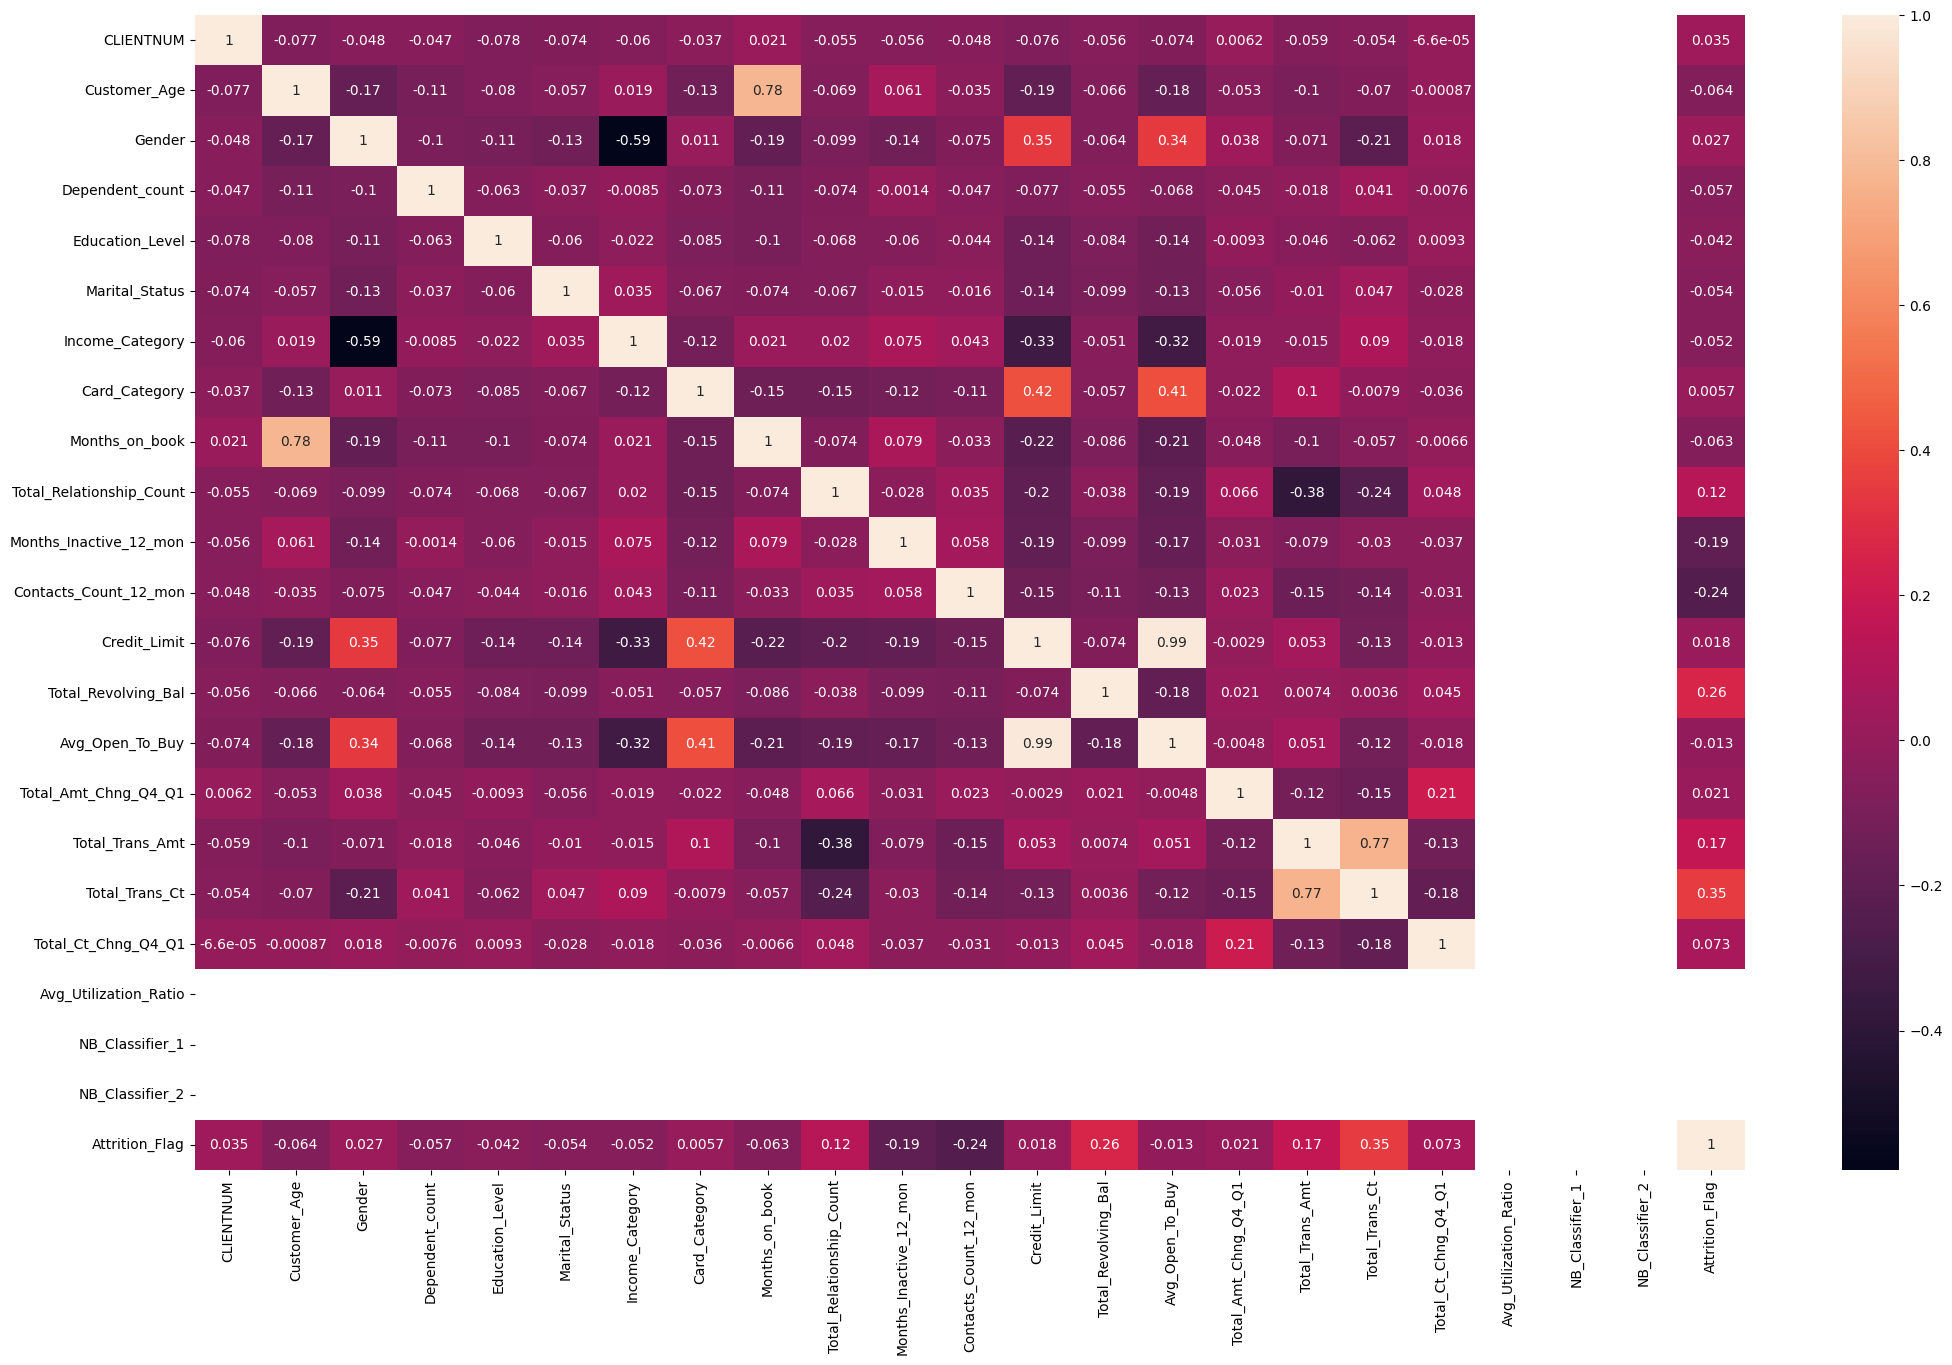

In [53]:

#multicolinearity

plt.figure(figsize=(25,15))
sb.heatmap(X_trainDf_resN.corr(), annot=True)

In [54]:
#drop one of the high correlation column
X_trainDf_resN.drop(columns= 'Avg_Open_To_Buy', inplace= True)

In [55]:
#split the X_train Data into X and y
train_features = ['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'NB_Classifier_1',
       'NB_Classifier_2']
train_target = ['Attrition_Flag']

X_train = X_trainDf_resN[train_features].values
y_train = X_trainDf_resN[train_target].values

In [56]:
#Univariate Feature selection

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(X_train, y_train)
print(fit.scores_)
features = fit.transform(X_train)
# summarize selected features
print(features[0:10,:])

[ 1.89654114  1.26515585  1.63270205  2.08231456  1.34563775  1.54064911
  2.14039208  0.10684135  1.11902061 11.38725178 12.61359136 23.61133011
  0.3968883  68.23759373  0.60968685 17.72681108 42.09428347  8.00459071
         nan         nan         nan]
[[0.39045283 0.08134434 0.24403302 0.15066639 0.01721564 0.12107064
  0.16268868]
 [0.30716438 0.08532344 0.         0.         0.03922011 0.03968532
  0.34129375]
 [0.17341474 0.28902456 0.07225614 0.43353684 0.01594347 0.03360751
  0.28902456]
 [0.39733368 0.08277785 0.         0.         0.00845555 0.06930239
  0.3311114 ]
 [0.25111012 0.10462922 0.20925843 0.31101939 0.02018772 0.06813065
  0.        ]
 [0.34185522 0.05697587 0.17092761 0.30749314 0.01559593 0.05565085
  0.        ]
 [0.07680164 0.12800273 0.12800273 0.2129819  0.02196286 0.077397
  0.        ]
 [0.31124728 0.12968637 0.         0.38905911 0.01818236 0.04222347
  0.12968637]
 [0.45380545 0.22690272 0.22690272 0.30235667 0.02350578 0.07739318
  0.        ]
 [0.343

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression() 
rfe = RFE(model, n_features_to_select=7)
fit = rfe.fit(X_train, y_train) 
print(fit.support_)
print(fit.ranking_)

[False False False False False False False False False  True  True  True
 False  True False  True  True  True False False False]
[ 3  7  2 10  8 12  9 11  6  1  1  1  5  1  4  1  1  1 13 14 15]


In [58]:
X_trainDf_resN.columns 

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'NB_Classifier_1',
       'NB_Classifier_2', 'Attrition_Flag'],
      dtype='object')

In [59]:
X_train = X_trainDf_resN[['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1']].values
y_train = X_trainDf_resN[['Attrition_Flag']]

In [60]:
X_test = X_testDf_resN[['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1']]

In [61]:
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 89.921


In [62]:
df_X_train = pd.DataFrame(X_train, columns= ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1'])
df_X_train

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,0.390453,0.081344,0.244033,0.150666,0.017216,0.121071,0.162689
1,0.307164,0.085323,0.000000,0.000000,0.039220,0.039685,0.341294
2,0.173415,0.289025,0.072256,0.433537,0.015943,0.033608,0.289025
3,0.397334,0.082778,0.000000,0.000000,0.008456,0.069302,0.331111
4,0.251110,0.104629,0.209258,0.311019,0.020188,0.068131,0.000000
...,...,...,...,...,...,...,...
9110,0.278850,0.077458,0.309834,0.111895,0.364219,0.396299,0.000000
9111,0.176271,0.146892,0.220339,0.324074,0.366929,0.365523,0.000000
9112,0.289795,0.160997,0.241496,0.419476,0.221799,0.220903,0.000000
9113,0.440483,0.275302,0.367069,0.000000,0.299625,0.213412,0.000000


## Communicating result
### Result deployment

In [63]:
def make_prediction(Total_Relationship_Count, Months_Inactive_12_mon,
       Contacts_Count_12_mon, Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct,
       Total_Ct_Chng_Q4_Q1):
    data = {
        'Total_Relationship_Count': Total_Relationship_Count,
        'Months_Inactive_12_mon': Months_Inactive_12_mon, 
        'Contacts_Count_12_mon' : Contacts_Count_12_mon,
        'Total_Revolving_Bal': Total_Revolving_Bal,
        'Total_Trans_Amt': Total_Trans_Amt,
        'Total_Trans_Ct': Total_Trans_Ct,
        'Total_Ct_Chng_Q4_Q1': Total_Ct_Chng_Q4_Q1
    }
    df = pd.DataFrame(data, index = [0])
    prediction =model.predict(df).round(2)[0] 
    return f" predict customer who is gonna get churned: {prediction}"

In [64]:
make_prediction(5, 1, 3, 777, 1144, 42, 1.625)

' predict customer who is gonna get churned: 1'

In [65]:
#interactivity
interact(
    make_prediction,
    Total_Relationship_Count =IntSlider(
        min=df['Total_Relationship_Count'].min(),
        max=df['Total_Relationship_Count'].max(),
        value=df['Total_Relationship_Count'].mean(),
    ),
    Months_Inactive_12_mon =IntSlider(
        min=df['Months_Inactive_12_mon'].min(),
        max=df['Months_Inactive_12_mon'].max(),
        #step=0.01,
        value=df['Months_Inactive_12_mon'].mean(),
    ),
   Contacts_Count_12_mon = IntSlider(
        min=df['Contacts_Count_12_mon'].min(),
        max=df['Contacts_Count_12_mon'].max(),
        #step=0.01,
        value=df['Contacts_Count_12_mon'].mean(),
    ),
    Total_Revolving_Bal =IntSlider(
        min=df['Total_Revolving_Bal'].min(),
        max=df['Total_Revolving_Bal'].max(),
        value=df['Total_Revolving_Bal'].mean(),
    ),
    Total_Trans_Amt =IntSlider(
        min=df['Total_Trans_Amt'].min(),
        max=df['Total_Trans_Amt'].max(),
        #step=0.01,
        value=df['Total_Trans_Amt'].mean(),
    ),
   Total_Trans_Ct = IntSlider(
        min=df['Total_Trans_Ct'].min(),
        max=df['Total_Trans_Ct'].max(),
        #step=0.01,
        value=df['Total_Trans_Ct'].mean(),
    ),
    
    Total_Ct_Chng_Q4_Q1 = FloatSlider(
        min=df['Total_Ct_Chng_Q4_Q1'].min(),
        max=df['Total_Ct_Chng_Q4_Q1'].max(),
        step=0.01,
        value=df['Total_Ct_Chng_Q4_Q1'].mean(),
    ));

interactive(children=(IntSlider(value=3, description='Total_Relationship_Count', max=6, min=1), IntSlider(valu…